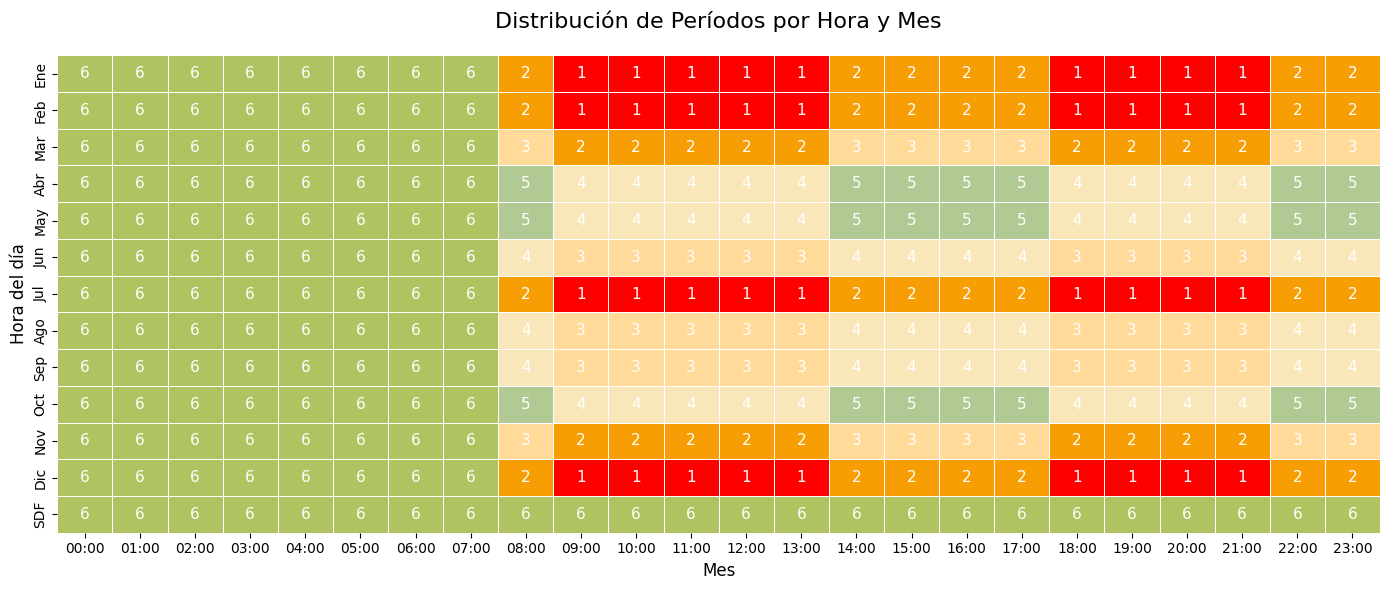

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Datos proporcionados
meses = {
    "Ene": [6,6,6,6,6,6,6,6,2,1,1,1,1,1,2,2,2,2,1,1,1,1,2,2],
    "Feb": [6,6,6,6,6,6,6,6,2,1,1,1,1,1,2,2,2,2,1,1,1,1,2,2],
    "Mar": [6,6,6,6,6,6,6,6,3,2,2,2,2,2,3,3,3,3,2,2,2,2,3,3],
    "Abr": [6,6,6,6,6,6,6,6,5,4,4,4,4,4,5,5,5,5,4,4,4,4,5,5],
    "May": [6,6,6,6,6,6,6,6,5,4,4,4,4,4,5,5,5,5,4,4,4,4,5,5],
    "Jun": [6,6,6,6,6,6,6,6,4,3,3,3,3,3,4,4,4,4,3,3,3,3,4,4],
    "Jul": [6,6,6,6,6,6,6,6,2,1,1,1,1,1,2,2,2,2,1,1,1,1,2,2],
    "Ago": [6,6,6,6,6,6,6,6,4,3,3,3,3,3,4,4,4,4,3,3,3,3,4,4],
    "Sep": [6,6,6,6,6,6,6,6,4,3,3,3,3,3,4,4,4,4,3,3,3,3,4,4],
    "Oct": [6,6,6,6,6,6,6,6,5,4,4,4,4,4,5,5,5,5,4,4,4,4,5,5],
    "Nov": [6,6,6,6,6,6,6,6,3,2,2,2,2,2,3,3,3,3,2,2,2,2,3,3],
    "Dic": [6,6,6,6,6,6,6,6,2,1,1,1,1,1,2,2,2,2,1,1,1,1,2,2],
    "SDF": [6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6]
}

# Crear DataFrame
df = pd.DataFrame(meses)

# Asignar nombres a las filas (horas del día)
df.index = [f"{h:02d}:00" for h in range(24)]
df=df.T

# Paleta de colores para los períodos
colores_periodos = {
    # 1: "#afc460",  # Verde
    1: "red",      
    2: "#f79e05",  
    3: "#ffd97a",  
    4: "#fae7b9",  
    5: "#b1c993",  
    6: "#afc460",  
}
# Crear mapa de colores
cmap = ListedColormap([colores_periodos[p] for p in sorted(colores_periodos.keys())])

# Configurar el tamaño de la figura
plt.figure(figsize=(14, 6))

# Crear heatmap
heatmap = sns.heatmap(
    df,
    cmap=cmap,
    annot=True,
    fmt="d",
    cbar=False,
    linewidths=0.5,
    linecolor="white",
    annot_kws={"size": 11, "color": "white"}
)

# Personalización
plt.title("Distribución de Períodos por Hora y Mes", fontsize=16, pad=20)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Hora del día", fontsize=12)

# Ajustar márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()



In [3]:
            # 4. Paleta de colores según la imagen (asumiendo colores estándar)
            colores_periodos = {
                1: "#4CAF50",  # Verde
                2: "#FF9800",  # Naranja
                3: "#2196F3",  # Azul
                4: "#9C27B0",  # Púrpura
                5: "#607D8B",  # Gris azulado
                6: "#795548",  # Marrón
            }


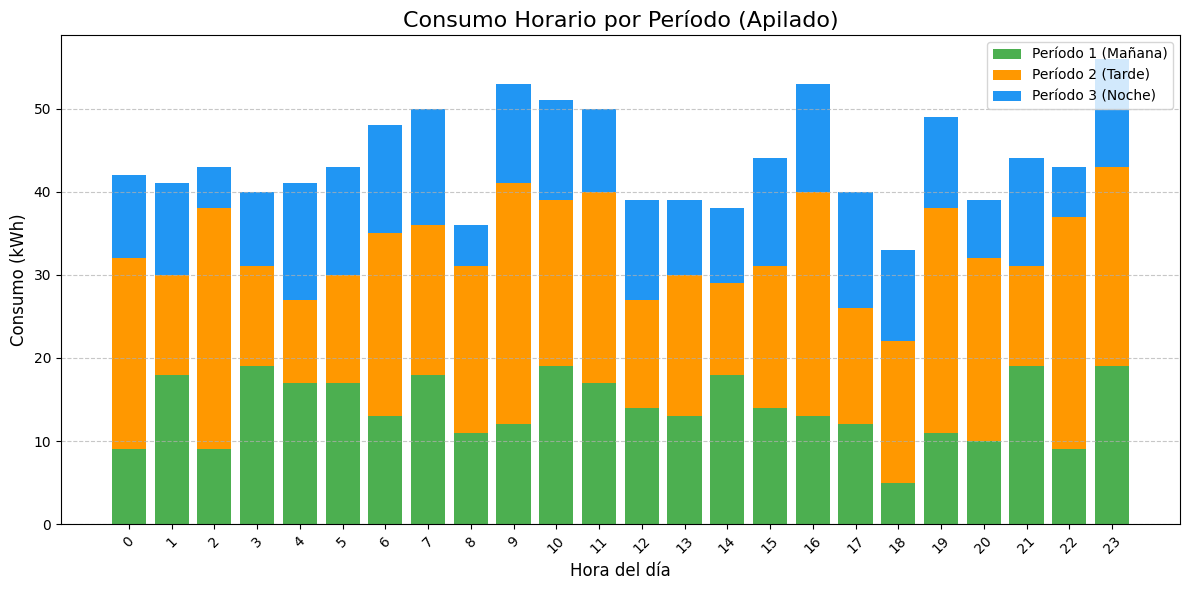

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (consumo por hora y período)
horas = np.arange(24)  # Horas del día (0 a 23)
periodo1 = np.random.randint(5, 20, size=24)  # Consumo Período 1 (mañana)
periodo2 = np.random.randint(10, 30, size=24)  # Consumo Período 2 (tarde)
periodo3 = np.random.randint(3, 15, size=24)  # Consumo Período 3 (noche)

# Configuración del gráfico
plt.figure(figsize=(12, 6))
plt.bar(horas, periodo1, label='Período 1 (Mañana)', color='#4CAF50')
plt.bar(horas, periodo2, bottom=periodo1, label='Período 2 (Tarde)', color='#FF9800')
plt.bar(horas, periodo3, bottom=periodo1 + periodo2, label='Período 3 (Noche)', color='#2196F3')

# Personalización
plt.title('Consumo Horario por Período (Apilado)', fontsize=16)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Consumo (kWh)', fontsize=12)
plt.xticks(horas, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [3]:
import requests
import json
import os
from datetime import datetime, timedelta

def obtener_fechas_descarga():
    """Calcula las fechas de inicio y fin para los últimos 12 meses completos"""
    hoy = datetime.today()
    primer_dia_mes_actual = datetime(hoy.year, hoy.month, 1)
    ultimo_dia_mes_anterior = primer_dia_mes_actual - timedelta(days=1)
    primer_dia_mes_anterior = datetime(ultimo_dia_mes_anterior.year, ultimo_dia_mes_anterior.month, 1)
    
    primer_dia_12_meses_atras = primer_dia_mes_anterior - timedelta(days=3)
    fecha_inicio = primer_dia_12_meses_atras.strftime('%Y-%m-%dT00:00:00')
    fecha_fin = ultimo_dia_mes_anterior.strftime('%Y-%m-%dT23:59:59')
    
    return fecha_inicio, fecha_fin

def descargar_datos_api(indicator_ids, fecha_inicio, fecha_fin, api_key):
    """Descarga datos de la API y los guarda en archivos JSON"""
    headers = {
        "Accept": "application/json; application/vnd.esios-api-v1+json",
        "Content-Type": "application/json",
        "x-api-key": api_key
    }
    
    datos_descargados = {}
    
    for indicator_id in indicator_ids:
        json_filename = f"indicador_{indicator_id}_{fecha_inicio[:7]}_a_{fecha_fin[:7]}.json"
        
        if os.path.exists(json_filename):
            print(f"El archivo para el indicador {indicator_id} ya existe: {json_filename}. No se descargará nuevamente.")
            with open(json_filename, "r", encoding="utf-8") as json_file:
                datos_descargados[indicator_id] = json.load(json_file)
        else:
            print(f"Descargando datos para el indicador {indicator_id}...")
            url = f"https://api.esios.ree.es/indicators/{indicator_id}?start_date={fecha_inicio}&end_date={fecha_fin}"
            response = requests.get(url, headers=headers)

            if response.status_code == 200:
                data = response.json()
                with open(json_filename, "w", encoding="utf-8") as json_file:
                    json.dump(data, json_file, indent=4, ensure_ascii=False)
                print(f"JSON guardado en {json_filename}")
                datos_descargados[indicator_id] = data
            else:
                print(f"Error al obtener el indicador {indicator_id}: {response.status_code}")
                datos_descargados[indicator_id] = None
    
    return datos_descargados

# Configuración y ejecución de la descarga
API_KEY = "af850ff28e45f31c0345edbfadcea91ab243d7f45e1b875b4b7c67b3a9c41b2a"
indicator_ids = [1001, 1739]
fecha_inicio, fecha_fin = obtener_fechas_descarga()

datos_api = descargar_datos_api(indicator_ids, fecha_inicio, fecha_fin, API_KEY)

Descargando datos para el indicador 1001...
JSON guardado en indicador_1001_2025-02_a_2025-03.json
Descargando datos para el indicador 1739...
JSON guardado en indicador_1739_2025-02_a_2025-03.json


In [1]:
import requests
import json
import os
from datetime import datetime, timedelta
import pandas as pd

def obtener_fechas_descarga():
    """Calcula las fechas de inicio y fin para los últimos 12 meses completos"""
    hoy = datetime.today()
    primer_dia_mes_actual = datetime(hoy.year, hoy.month, 1)
    ultimo_dia_mes_anterior = primer_dia_mes_actual - timedelta(days=1)
    primer_dia_mes_anterior = datetime(ultimo_dia_mes_anterior.year, ultimo_dia_mes_anterior.month, 1)
    
    primer_dia_12_meses_atras = primer_dia_mes_anterior - timedelta(days=3)
    fecha_inicio = primer_dia_12_meses_atras.strftime('%Y-%m-%dT00:00:00')
    fecha_fin = ultimo_dia_mes_anterior.strftime('%Y-%m-%dT23:59:59')
    
    return fecha_inicio, fecha_fin

def descargar_datos_api(indicator_ids, fecha_inicio, fecha_fin, api_key):
    """Descarga datos de la API y los guarda en archivos JSON"""
    headers = {
        "Accept": "application/json; application/vnd.esios-api-v1+json",
        "Content-Type": "application/json",
        "x-api-key": api_key
    }
    
    datos_descargados = {}
    
    for indicator_id in indicator_ids:
        excel_filename = f"indicador_{indicator_id}_{fecha_inicio[:7]}_a_{fecha_fin[:7]}.xlsx"
        
        if os.path.exists(excel_filename):
            print(f"El archivo para el indicador {indicator_id} ya existe: {excel_filename}. No se descargará nuevamente.")
            # with open(excel_filename, "r", encoding="utf-8") as json_file:
            #     datos_descargados[indicator_id] = json.load(json_file)
        else:
            print(f"Descargando datos para el indicador {indicator_id}...")
            url = f"https://api.esios.ree.es/indicators/{indicator_id}?start_date={fecha_inicio}&end_date={fecha_fin}"
            response = requests.get(url, headers=headers)

            if response.status_code == 200:
                data = response.json()

                if data is None:
                    continue
                    
                # Extraer valores y convertir a DataFrame
                valores = data['indicator']['values']
                df = pd.DataFrame(valores)

                # Filtrar solo geo_name "Península" o "España"
                df = df[df['geo_name'].isin(["Península", "España"])]

                # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
                # Convertir la columna datetime a formato datetime
                # df['datetime'] = pd.to_datetime(df['datetime'])
                # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

                # Ordenar por fecha
                df = df.sort_values('datetime')

                # Mantener solo dos columnas: datetime (índice) y Value
                df = df[['datetime', 'value']].rename(columns={'value': 'Value'}).set_index('datetime')
                print(df)
                df.to_excel(excel_filename)


            else:
                print(f"Error al obtener el indicador {indicator_id}: {response.status_code}")
                datos_descargados[indicator_id] = None
    
    return datos_descargados

# Configuración y ejecución de la descarga
API_KEY = "af850ff28e45f31c0345edbfadcea91ab243d7f45e1b875b4b7c67b3a9c41b2a"
indicator_ids = [1001, 1739]
fecha_inicio, fecha_fin = obtener_fechas_descarga()

datos_api = descargar_datos_api(indicator_ids, fecha_inicio, fecha_fin, API_KEY)

El archivo para el indicador 1001 ya existe: indicador_1001_2025-02_a_2025-03.xlsx. No se descargará nuevamente.
El archivo para el indicador 1739 ya existe: indicador_1739_2025-02_a_2025-03.xlsx. No se descargará nuevamente.
